### Task 1 
Implement the OR Boolean logic gate using perceptron Neural Network. Inputs = x1, x2 and 
bias, weights should be fed into the perceptron with single Output = y. Display final weights 
and bias of each perceptron

In [21]:
import numpy as np
import tensorflow as tf

In [22]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 1])
w1 = 1
w2 = 1
b = 0

In [23]:
def step(z):
    return 1 if z>=1 else 0

In [24]:
for i in range(X.shape[0]):
    z = w1*X[i][0] + w2*X[i][1] + b
    print(f"Input: {X[i]} → Output:", step(z))

Input: [0 0] → Output: 0
Input: [0 1] → Output: 1
Input: [1 0] → Output: 1
Input: [1 1] → Output: 1


#### Using the updating weights and bias approach:

In [25]:
w = np.random.rand(2)
b = np.random.rand(1)

epochs = 5
learning_rate = 0.1

for epoch in range(epochs):
    for i in range(X.shape[0]):
        z = np.dot(w, X[i]) + b
        y_pred = step(z)
        error = y[i] - y_pred
        w += learning_rate * error * X[i]
        b += learning_rate * error

print("Trained weights:", w)
print("Trained bias:", b)


Trained weights: [0.67763061 0.98066931]
Trained bias: [0.96288341]


In [26]:
print("\nPredictions:")
for i in range(len(X)):
    z = np.dot(w, X[i]) + b
    print(f"Input: {X[i]} → Output:", step(z))


Predictions:
Input: [0 0] → Output: 0
Input: [0 1] → Output: 1
Input: [1 0] → Output: 1
Input: [1 1] → Output: 1


### Task 2 
Use the heart disease dataset and do the following 
- Use the Dataset  
- Create an autoencoder and fit it with our data using 2 neurons in the dense layer 
-  Plot loss w.r.t. epochs 
- Calculate reconstruction error using Mean Squared Error (MSE). 

In [27]:
import pandas as pd

In [28]:
X = pd.read_csv('Data/heart.csv')

In [29]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [32]:
autoencoder = Sequential([
    Input(shape = (X.shape[1], )),
    Dense(2, activation='relu'),
    Dense(X.shape[1], activation='sigmoid')
])

In [33]:
autoencoder.compile(optimizer='adam', loss='mse')

In [34]:
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16, shuffle=True, validation_split=0.2)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3091 - val_loss: 1.2259
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2780 - val_loss: 1.1955
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2502 - val_loss: 1.1680
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2253 - val_loss: 1.1423
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2028 - val_loss: 1.1191
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1821 - val_loss: 1.0968
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1622 - val_loss: 1.0754
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1433 - val_loss: 1.0551
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1254 - val_loss: 1.0362
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1087 - val_loss: 1.0190
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0934 - val_loss: 1.0038
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0796 - val_lo

In [35]:
encoder  =Sequential([autoencoder.layers[0]])
encoded_data = encoder.predict(X_scaled)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


The reduced dimention values are as follows:

In [36]:
encoded_data

array([[0.4363609, 0.6735984],
       [0.       , 4.5518847],
       [0.       , 6.68523  ],
       ...,
       [0.       , 7.929942 ],
       [6.1295547, 2.3963432],
       [0.       , 4.846034 ]], shape=(1025, 2), dtype=float32)

In [37]:
preds = []
loss = []
for i in range(1,8):
    autoencoder = Sequential([
        Input(shape = (X.shape[1], )),
        Dense(i, activation='relu'),
        Dense(X.shape[1], activation='sigmoid')
    ])
    autoencoder.compile(optimizer='adam', loss='mse')
    history = autoencoder.fit(X_scaled, X_scaled, epochs=20, batch_size=16, shuffle=True, validation_split=0.2)
    preds.append(autoencoder.predict(X_scaled))
    loss.append(history.history['loss'])
    print(f'Encoding Dimension: {i}, Loss: {loss[-1]}')

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2832 - val_loss: 1.2033
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2611 - val_loss: 1.1835
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2422 - val_loss: 1.1661
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2255 - val_loss: 1.1510
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2104 - val_loss: 1.1373
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1962 - val_loss: 1.1240
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1820 - val_loss: 1.1110
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1676 - val_loss: 1.0974
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1522 - val_loss: 1.0834
Epoch 10/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1363 - val_loss: 1.0688
Epoch 11/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1201 - val_loss: 1.0545
Epoch 12/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1037 - val_lo

In [38]:
loss

[[1.2831521034240723,
  1.2611310482025146,
  1.242155909538269,
  1.2254847288131714,
  1.2104400396347046,
  1.1961543560028076,
  1.1820470094680786,
  1.167638897895813,
  1.1521997451782227,
  1.1363461017608643,
  1.1200652122497559,
  1.1037242412567139,
  1.087790846824646,
  1.0731830596923828,
  1.060219407081604,
  1.0485895872116089,
  1.0384330749511719,
  1.0295852422714233,
  1.0219604969024658,
  1.015328049659729],
 [1.251167893409729,
  1.2222402095794678,
  1.1958192586898804,
  1.170384168624878,
  1.1456682682037354,
  1.1202806234359741,
  1.0931165218353271,
  1.065946340560913,
  1.0403627157211304,
  1.0177333354949951,
  0.9980093836784363,
  0.9814159274101257,
  0.9678815007209778,
  0.9565631151199341,
  0.9476122856140137,
  0.9404034614562988,
  0.9344808459281921,
  0.9295568466186523,
  0.9255173802375793,
  0.9221017956733704],
 [1.3032701015472412,
  1.265808343887329,
  1.2327265739440918,
  1.2021225690841675,
  1.172741413116455,
  1.14461040496826

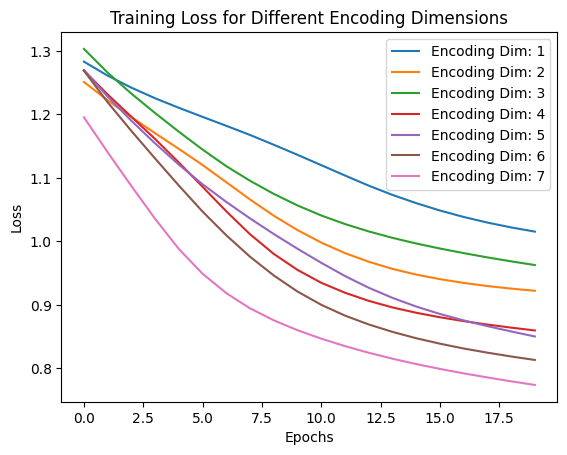

In [39]:
import matplotlib.pyplot as plt

for i in range(len(loss)):
    plt.plot(loss[i], label=f'Encoding Dim: {i+1}')
plt.title('Training Loss for Different Encoding Dimensions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()